### Importing Packages

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

### Reading the Data

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

- There are 20640 samples.
- There are 8 attributes 
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude
- The target variable is MedInc        median income in block group

### Data Pre - Preprocessing

In [4]:
housing['data'].shape

(20640, 8)

In [5]:
df = pd.DataFrame(housing.data, columns = housing.feature_names)

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
df['Med_House_value'] = housing.target

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Med_House_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MedInc           20640 non-null  float64
 1   HouseAge         20640 non-null  float64
 2   AveRooms         20640 non-null  float64
 3   AveBedrms        20640 non-null  float64
 4   Population       20640 non-null  float64
 5   AveOccup         20640 non-null  float64
 6   Latitude         20640 non-null  float64
 7   Longitude        20640 non-null  float64
 8   Med_House_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


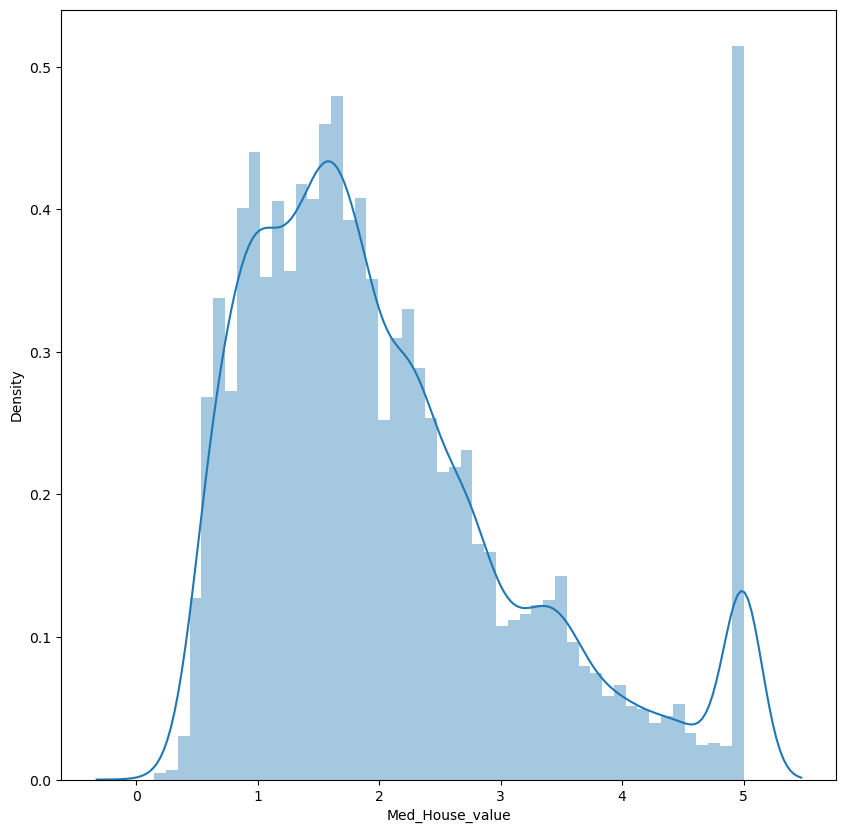

In [10]:
plt.figure(figsize = (10,10))
sns.distplot(df.Med_House_value, bins = 50)
plt.show()

In [11]:
q1 = np.quantile(df.Med_House_value, 0.25)
q3 = np.quantile(df.Med_House_value, 0.75)
IQR = q3 - q1
lower_bound = q1 - (1.5*IQR)
upper_bound = q3 + (1.5*IQR)

In [12]:
df[df.Med_House_value > upper_bound].shape

(1071, 9)

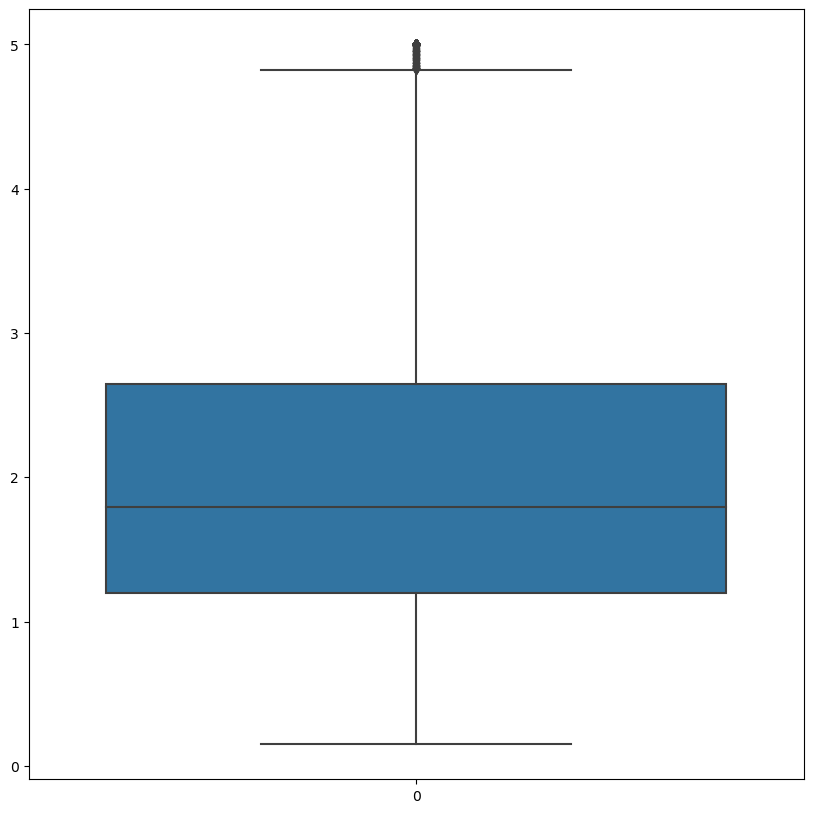

In [13]:
plt.figure(figsize = (10,10))
sns.boxplot(df.Med_House_value)
plt.show()

In [14]:
df[df.Med_House_value > upper_bound] = df.Med_House_value.median()

In [15]:
df[df.Med_House_value > upper_bound]['Med_House_value']= df.Med_House_value.median()

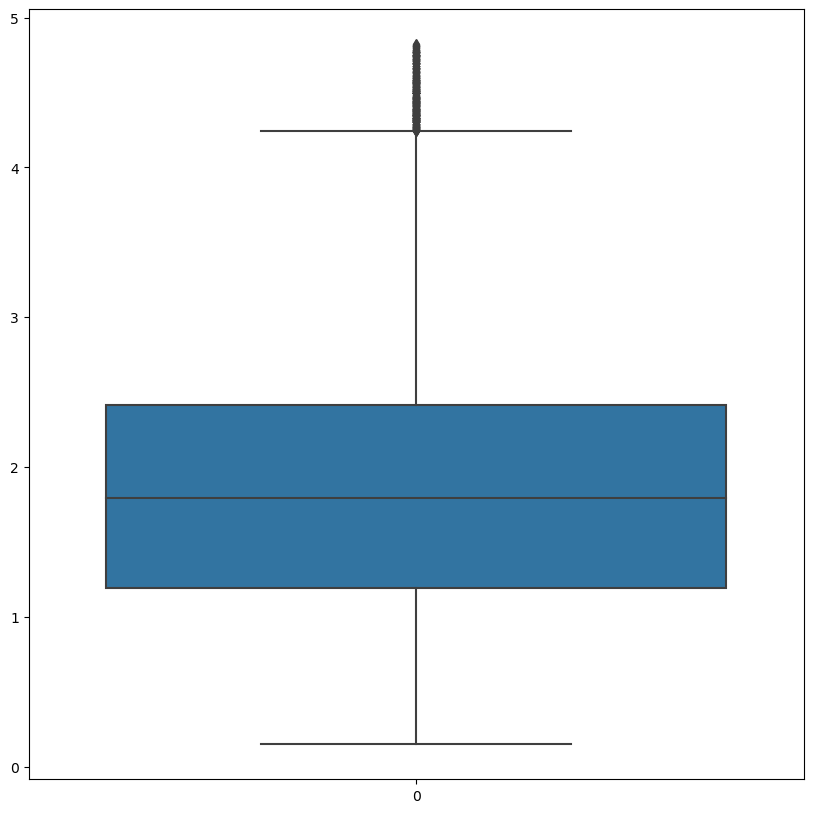

In [16]:
plt.figure(figsize = (10,10))
sns.boxplot(df.Med_House_value)
plt.show()

In [17]:
df['Med_House_value'].shape

(20640,)

In [18]:
df[df.Med_House_value > upper_bound].shape

(0, 9)

In [19]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Med_House_value
MedInc,1.000000,-0.056768,0.382192,-0.147522,0.114743,0.032978,0.234112,-0.263623,0.628281
HouseAge,-0.056768,1.000000,-0.008195,-0.216322,-0.135090,0.025788,0.421141,-0.441162,0.066912
AveRooms,0.382192,-0.008195,1.000000,0.639467,0.029910,0.004280,0.351877,-0.334388,0.110869
AveBedrms,-0.147522,-0.216322,0.639467,1.000000,-0.154394,-0.015490,-0.301436,0.332301,-0.067491
Population,0.114743,-0.135090,0.029910,-0.154394,1.000000,0.075025,0.235920,-0.267790,0.024403
AveOccup,0.032978,0.025788,0.004280,-0.015490,0.075025,1.000000,0.027286,-0.027565,-0.020216
Latitude,0.234112,0.421141,0.351877,-0.301436,0.235920,0.027286,1.000000,-0.978678,-0.014409
Longitude,-0.263623,-0.441162,-0.334388,0.332301,-0.267790,-0.027565,-0.978678,1.000000,-0.029964
Med_House_value,0.628281,0.066912,0.110869,-0.067491,0.024403,-0.020216,-0.014409,-0.029964,1.000000


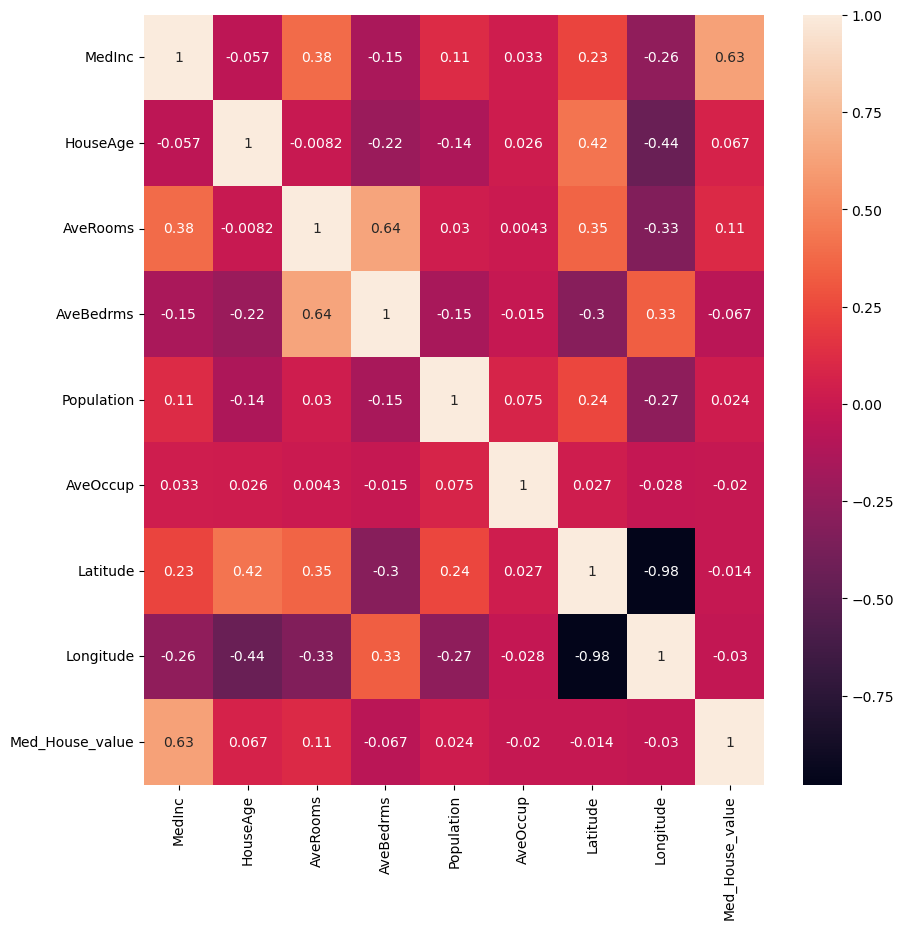

In [20]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [21]:
pd.DataFrame(df.corr()['Med_House_value'])

,Med_House_value
MedInc,0.628281
HouseAge,0.066912
AveRooms,0.110869
AveBedrms,-0.067491
Population,0.024403
AveOccup,-0.020216
Latitude,-0.014409
Longitude,-0.029964
Med_House_value,1.000000


In [22]:
pd.DataFrame(df.corr()['Med_House_value']).\
drop('Med_House_value').\
sort_values(by = 'Med_House_value')

,Med_House_value
AveBedrms,-0.067491
Longitude,-0.029964
AveOccup,-0.020216
Latitude,-0.014409
Population,0.024403
HouseAge,0.066912
AveRooms,0.110869
MedInc,0.628281


In [23]:
pd.DataFrame(df.corr()['Med_House_value']).\
drop('Med_House_value').sort_values(by = 'Med_House_value')

,Med_House_value
AveBedrms,-0.067491
Longitude,-0.029964
AveOccup,-0.020216
Latitude,-0.014409
Population,0.024403
HouseAge,0.066912
AveRooms,0.110869
MedInc,0.628281


### Splitting the Data

- Before starting any algorithm we need to split the input data and the output data

In [24]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Med_House_value'],
      dtype='object')

In [25]:
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']]
y = df[['Med_House_value']]

In [26]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [27]:
y.head()

,Med_House_value
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


### Dividing Data in Training Data and Testing Data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state= 42)

In [29]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((16512, 8), (4128, 8), (16512, 1), (4128, 1))

In [30]:
df.shape

(20640, 9)

### Applying Linear Regression

In [31]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

In [32]:
linear_model.coef_

array([[ 5.38134108e-01,  1.36407058e-02, -2.23473734e-01,
         1.05689227e+00,  1.78510595e-05, -4.06598115e-03,
        -5.10864866e-02, -1.66725736e-02]])

In [33]:
linear_model.intercept_

array([-0.59593418])

### Making Predictions

In [34]:
y_test_predictions = linear_model.predict(X_test)

In [35]:
y_test_predictions

array([[0.94449936],
       [1.5242571 ],
       [1.76422075],
       ...,
       [1.76422075],
       [1.38056528],
       [1.9883588 ]])

In [36]:
y_test_predictions[:5]

array([[0.94449936],
       [1.5242571 ],
       [1.76422075],
       [2.66894306],
       [1.90236198]])

### Metrics

In [37]:
from statsmodels.api import OLS
OLS(Y_train, X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Med_House_value   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                          1.959e+04
Date:                Sat, 02 Sep 2023   Prob (F-statistic):                        0.00
Time:                        09:23:13   Log-Likelihood:                         -16408.
No. Observations:               16512   AIC:                                  3.283e+04
Df Residuals:                   16504   BIC:                                  3.289e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5022      0.004    140.024      0.000       0.495       0.509
HouseAge       0.0135      0.000     29.451      0.000       0.013       0.014
AveRooms      -0.1709      0.004    -46.184      0.000      -0.178      -0.164
AveBedrms      0.7612      0.013     58.353      0.000       0.736       0.787
Population  1.659e-05   4.84e-06      3.430      0.001    7.11e-06    2.61e-05
AveOccup      -0.0040      0.000     -9.013      0.000      -0.005      -0.003
Latitude      -0.0583      0.003    -18.006      0.000      -0.065      -0.052
Longitude     -0.0154      0.001    -15.476      0.000      -0.017      -0.013
==============================================================================
Omnibus:                     3001.421   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8959.834
Skew:                           0.950   Prob(JB):                         0.00
Kurtosis:                       6.068   Cond. No.                     4.72e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- sklearn gives Gradient Descent coeff values
- statsmodel gives OLS method coeff
- we will now select the columns based on the P value < alpha
- then we will select few columns and then use the Linear Regression only

#### Performance

- Mean Square Error
- RMSE
- R Square

In [38]:
mse = mean_squared_error(Y_test, y_test_predictions)
rmse = np.sqrt(mse)
r_square = r2_score(Y_test, y_test_predictions)
mse, rmse, r_square

(0.44776774208979736, 0.6691544979224135, 0.48662035957168315)

### Saving the model

In [39]:
import pickle
pickle.dump(linear_model, 
           open('model.pkl', 'wb')) #wb is write bytes

### Load the model

In [40]:
model = pickle.load(open('model.pkl', 'rb'))

In [41]:
model.predict(X_test)

array([[0.94449936],
       [1.5242571 ],
       [1.76422075],
       ...,
       [1.76422075],
       [1.38056528],
       [1.9883588 ]])

In [42]:
model.predict([[1, 2, 3, 4, 5, 6, 7, 8]])

array([[3.01133659]])

In [43]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Med_House_value'],
      dtype='object')

In [45]:
df.to_csv('/Users/abhisheksaurav/Documents/Linear_Regression/testfile.csv')